<a href="https://colab.research.google.com/github/Shamiul-693/Intrusion-Detection-System-Using-Machine-Learning-CIC-IDS--2017-dataset-/blob/main/Intrusion_Detection_System_Using_Machine_Learning_(CIC_IDS_2017).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# tensorflow
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, Flatten, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
Friday_WorkingHours_Afternoon_DDos            = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
Friday_WorkingHours_Afternoon_PortScan        = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
Friday_WorkingHours_Morning                   = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Friday-WorkingHours-Morning.pcap_ISCX.csv")
Monday_WorkingHours                           = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Monday-WorkingHours.pcap_ISCX.csv")
Thursday_WorkingHours_Afternoon_Infilteration = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
Thursday_WorkingHours_Morning_WebAttacks      = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
Tuesday_WorkingHours                          = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Tuesday-WorkingHours.pcap_ISCX.csv")
Wednesday_workingHours                        = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Wednesday-workingHours.pcap_ISCX.csv")

In [3]:
df = pd.concat(
    [
        Friday_WorkingHours_Afternoon_DDos,
        Friday_WorkingHours_Afternoon_PortScan,
        Friday_WorkingHours_Morning,
        Monday_WorkingHours,
        Thursday_WorkingHours_Afternoon_Infilteration,
        Thursday_WorkingHours_Morning_WebAttacks,
        Tuesday_WorkingHours,
        Wednesday_workingHours
    ],
    axis=0
)
df.columns = Friday_WorkingHours_Afternoon_DDos.columns

In [27]:
rows, cols = df.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2522362
Number of columns: 79
Total cells: 199266598


In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692702,53,94939,4,2,188,226,47,47,47.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df.shape

(2830743, 79)

In [7]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [9]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [10]:

df.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [11]:
df.duplicated().sum()

308381

In [12]:
# Checking and counting duplicates
duplicates = df.duplicated()
duplicate_count = duplicates.sum()

# Output results
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 308381


In [13]:
# Removal of duplicates
df = df.drop_duplicates(keep='first')
del duplicates
df.shape

(2522362, 79)

In [14]:
pd.DataFrame({
    'column': df.columns,
    'null-count': df.isna().sum().values,
    '% null-count': np.round(df.isna().sum().values*100/len(df),6)
}).sort_values(by='null-count', ascending=False).reset_index(drop=True)

,column,null-count,% null-count
0,Flow Bytes/s,353,0.013995
1,Destination Port,0,0.000000
2,Bwd Avg Bytes/Bulk,0,0.000000
3,Fwd Avg Packets/Bulk,0,0.000000
4,Fwd Avg Bytes/Bulk,0,0.000000
...,...,...,...
74,Bwd IAT Mean,0,0.000000
75,Bwd IAT Total,0,0.000000
76,Fwd IAT Min,0,0.000000
77,Fwd IAT Max,0,0.000000


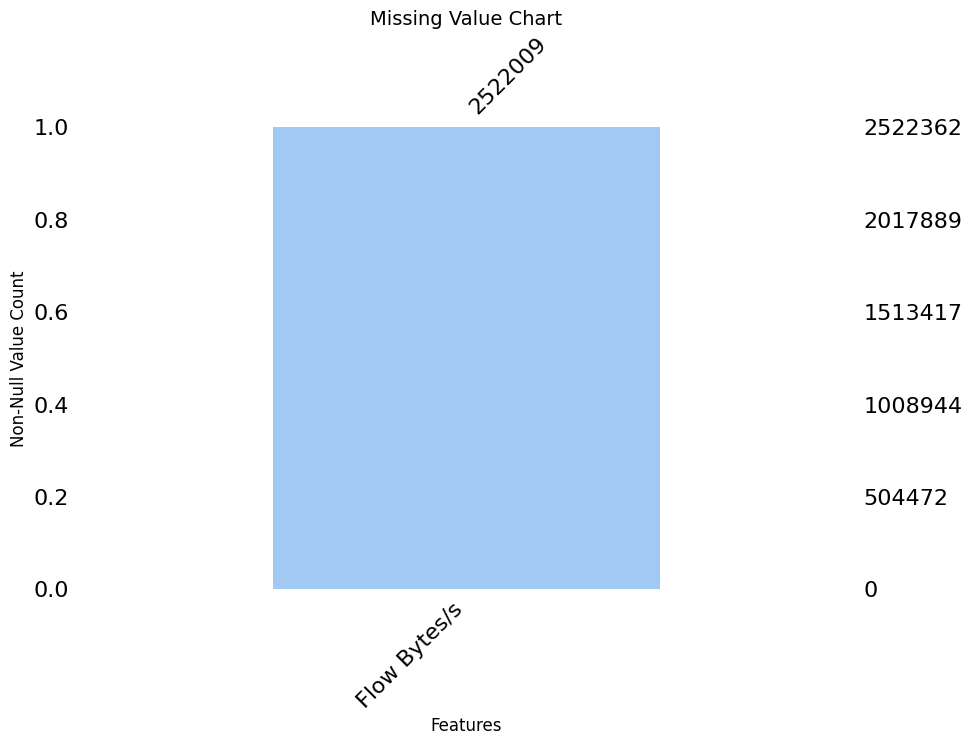

In [15]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('pastel')
colors = sns.color_palette()[0]  # Choose the first color from the pastel palette

# Identify columns with missing values
missing_vals = [col for col in df.columns if df[col].isna().any()]

# Plot missing value chart
fig, ax = plt.subplots(figsize=(10, 6))  # Wider figure for better readability
msno.bar(df[missing_vals], ax=ax, color=colors)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Non-Null Value Count', fontsize=12)
ax.set_title('Missing Value Chart', fontsize=14)
plt.show()

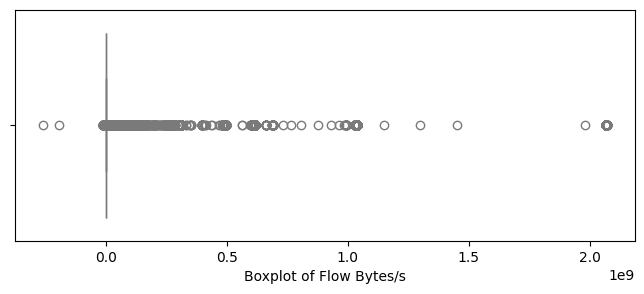

In [16]:
df = df.reset_index(drop=True)

# Now, create your box plot
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

In [17]:
med_flow_bytes = df['Flow Bytes/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)


Median of Flow Bytes/s:  3722.028051


In [18]:
df['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)

<ipython-input-18-aeb2800cc076>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)


In [19]:
print('Number of \'Flow Bytes/s\' missing values:', df['Flow Bytes/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0


In [20]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2522362.0,8.704762e+03,1.902507e+04,0.0,53.0,80.0,443.00,65535.0
Flow Duration,2522362.0,1.658132e+07,3.522426e+07,-13.0,208.0,50577.0,5329717.25,119999998.0
Total Fwd Packets,2522362.0,1.027627e+01,7.941738e+02,1.0,2.0,2.0,6.00,219759.0
Total Backward Packets,2522362.0,1.156596e+01,1.056594e+03,0.0,1.0,2.0,5.00,291922.0
Total Length of Fwd Packets,2522362.0,6.115751e+02,1.058499e+04,0.0,12.0,66.0,332.00,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2522362.0,6.542300e+04,6.109712e+05,0.0,0.0,0.0,0.00,110000000.0
Idle Mean,2522362.0,9.331578e+06,2.484157e+07,0.0,0.0,0.0,0.00,120000000.0
Idle Std,2522362.0,5.654433e+05,4.872678e+06,0.0,0.0,0.0,0.00,76900000.0
Idle Max,2522362.0,9.757716e+06,2.561067e+07,0.0,0.0,0.0,0.00,120000000.0


In [21]:
df.describe(include='O').T

,count,unique,top,freq
Label,2522362,15,BENIGN,2096484


In [22]:
df[" Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

New dimension:
Number of rows: 2522362
Number of columns: 79
Total cells: 199266598
